<center><img src=https://raw.githubusercontent.com/UncertainQubit/firstrepo/master/image.JPG></center>
<h1><center>Who survived the Titanic... (RIP Jack)</center></h1>

Using a dataset from Kaggle we will build a predictive AI model to guess who survived the Titanic crash using a type of model called a **decision tree**. We'll utilize a number of variables including:
* Survival
* Ticket class
* Sex	
* Age	
* \# of siblings / spouses aboard the Titanic	
* \# of parents / children aboard the Titanic	
* Ticket number	
* Passenger fare	
* Cabin number	
* Port of Embarkation

Then you'll have the opportunity to try and build a passenger with an ideal chance of survival.

## Housekeeping code
This code just imports our data and some code libraries.

In [1]:
# This code imports pandas as well as some specific scikitlearn functions
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Loads our data about Titanic passengers and stores it as a variable
file_path = 'https://raw.githubusercontent.com/UncertainQubit/firstrepo/master/train.csv'

# Reads our data and stores it as a DataFrame
titanic_data = pd.read_csv(file_path)

## Manual Analysis
Before we begin making our predictive model we need to do some manual analysis of the data.

In [3]:
# Displays the first five rows of our data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Displays all the columns in our dataset
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Time to finalize our data...
First, we have to use some of the manual analysis we did. The passenger's name is obviously not a factor in their survival so it doesn't make sense to include that to train our model. In fact, it could even conduse the model or create associations thta obscure the real data. For example, say that a family all survives. If names are included the mdoel might think that survival chances are somehow impcted by sharing that name rather than other factors such as that family all traveling in first class.

In [5]:
# Replace male with 0 and female with 1
titanic_data = titanic_data.replace(to_replace='male', value='0', regex=True)
titanic_data = titanic_data.replace(to_replace='fe0', value='1', regex=True)

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Split our data into what we wish to predict (y) and what we will use to predict it (X)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

titanic_data = titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].dropna()

y = titanic_data.Survived

X = titanic_data[features]

In [8]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

## Time to specify and train our model...
We'll be using a Decision Tree model from Scikit Learn...
<center><img src =https://raw.githubusercontent.com/UncertainQubit/firstrepo/master/R3ywQsR.png></center>

A decision tree is a lot like an AI-generated flow chart with potentially thousands of nodes.

In [9]:
# Specifies what algorithm we will use for our model and some hyperparameters
model = DecisionTreeClassifier(max_leaf_nodes = 10000)

In [10]:
# Fits our model on training data
model.fit(train_X, train_y)

DecisionTreeClassifier(max_leaf_nodes=10000)

## I'm confused. What do decision trees look like?
Below you can see a visual representation of what the AI-generated decision tree looks like.

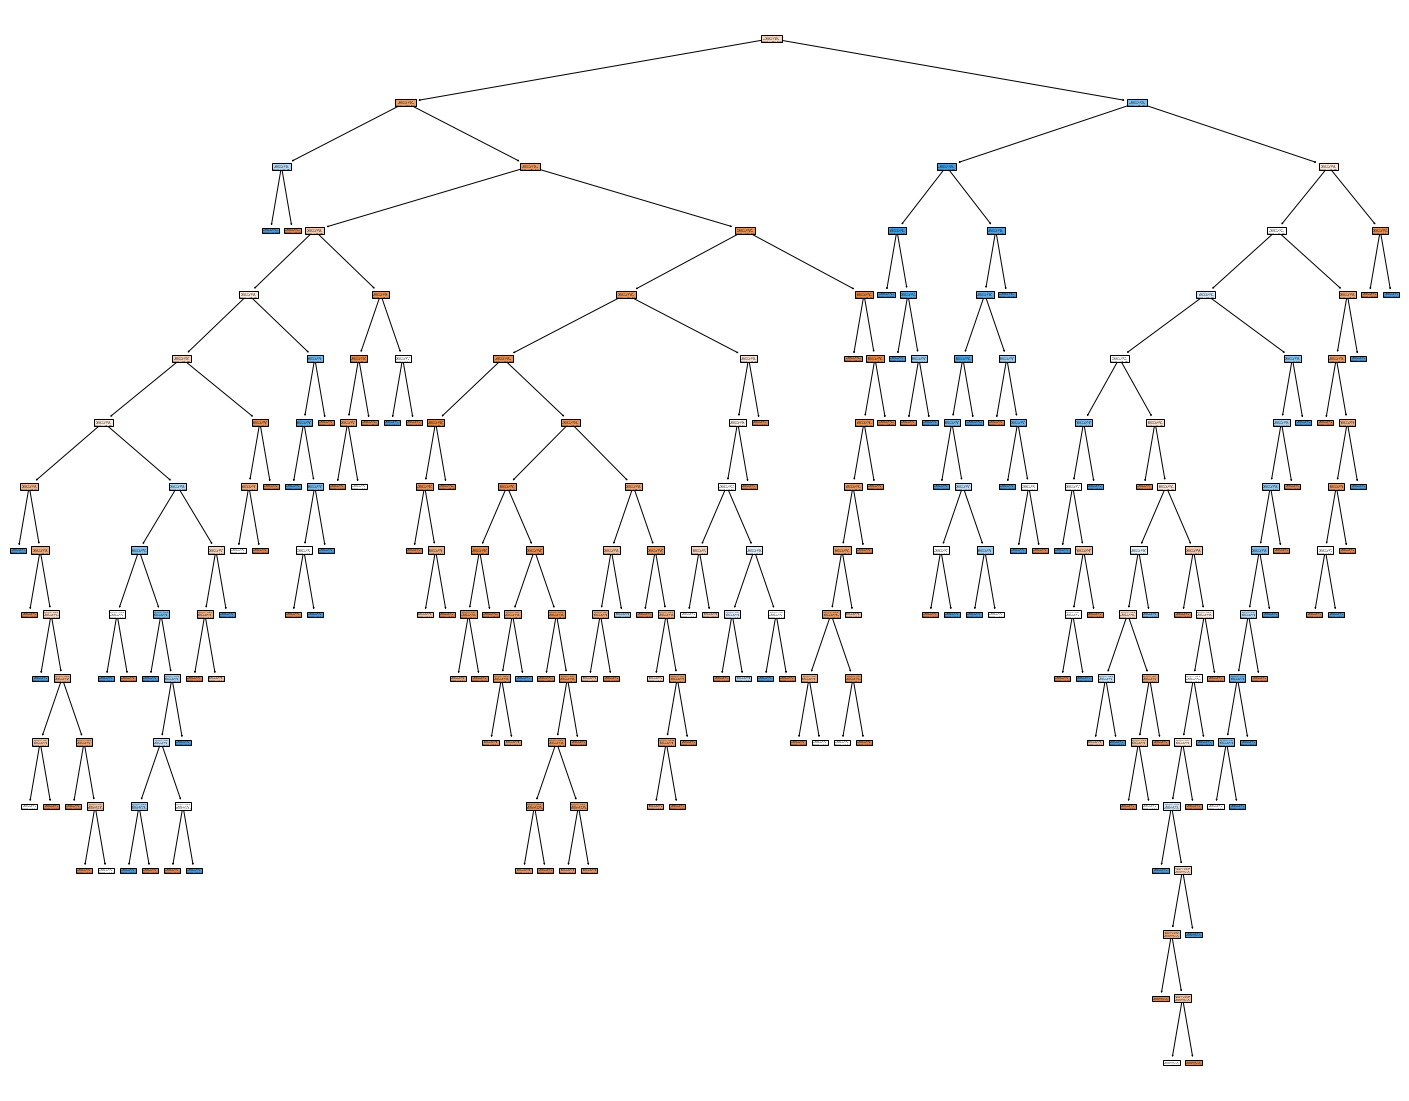

In [11]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True)

In [12]:
# Calculate and print the accuracy of the model
accuracy = model.score(val_X, val_y)
print('Accuracy: {0:%}'.format(accuracy))

Accuracy: 75.977654%


## Would you survive?
Play around with the sliders below to see the model's predicted survival percentages.

In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import IntSlider
def test(Pclass, Sex, Age, SibSp, Parch):
    data = {'Pclass' : [Pclass], 'Sex' : [Sex], 'Age' : [Age], 'SibSp' : [SibSp], 'Parch' : [Parch]}
    sample_person = pd.DataFrame.from_dict(data)
    array = model.predict_proba(sample_person)
    array = str(array[0])
    array = array.replace('[', '')
    array = array.replace(']', '')
    split_list = array.split(' ', 1)
    death = float(split_list[0] + '0')
    survival = float(split_list[1] + '0')
    print('Percent chance of death: {0:%}'.format(death))
    print('Percent chance of survival: {0:%}'.format(survival))
style = {'description_width': 'initial'}
interact(
    test, Pclass=widgets.IntSlider(min=1, max=3, step=1, description='Ticket Class:', style=style, readout=True, continuous_update=True),
    Sex=widgets.IntSlider(min=0, max=1, step=1, description='Sex:', style=style, readout=True, continuous_update=True),
    Age=widgets.IntSlider(min=1, max=100, step=1, description='Age:', style=style, readout=True, continuous_update=True),
    SibSp=widgets.IntSlider(min=0, max=9, step=1, description='Siblings/Spouses:', style=style, readout=True, continuous_update=True),
    Parch=widgets.IntSlider(min=0, max=5, step=1, description='Parents/Children:', style=style, readout=True, continuous_update=True)
    
);

interactive(children=(IntSlider(value=1, description='Ticket Class:', max=3, min=1, style=SliderStyle(descript…